**ModSim |** Projeto Final

In [225]:
def Molas(k, l0, numero_empilhadas, conjuntos): #Função responsável por calcular a associação de molas
    LFinal = numero_empilhadas*l0
    kFinal = (k/numero_empilhadas)*conjuntos
    return LFinal, kFinal

def Derivadas(L, lista_tempo, Melevador, Mpessoas, g, p, Ca, A, Fm, L0Mola, KMola, Fundo):
    Y = L[0]
    V = L[1]
    
    if Y <= -1*Fundo:
        dydt = 0
        dvdt = 0
    
    else:
        if V > 0: #SUBINDO
            if Y <= 0: #Contato com a mola --> A mola fica no subterrâneo
                Fe = KMola*(0-Y)
            else: #Sem contato com a mola --> Não há força elástica
                Fe = 0
            dydt = V
            dvdt = ((-(Melevador+Mpessoas)*g)-0.5*p*(V**2)*Ca*A + Fm + Fe)/(Melevador+Mpessoas)

        else: #DESCENDO
            if Y <= 0: 
                Fe = KMola*(0-Y)
            else:
                Fe = 0
            dydt = V
            dvdt = ((-(Melevador+Mpessoas)*g)+0.5*p*(V**2)*Ca*A + Fm + Fe)/(Melevador+Mpessoas)
    
    Aceleracao.append(dvdt)
    return dydt, dvdt    

In [226]:
#PARÂMETROS --> Queda sem mola
from numpy import linspace
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

L = [460, 0] #Condições iniciais --> começa no topo do prédio em repouso
Melevador = 1500
Mpessoas = 4800
g = 9.807
p = 1.2
Ca = 1
A = 4
L0Mola = 0
KMola = 0
Fm = 0
Fundo = 250
Aceleracao = list()

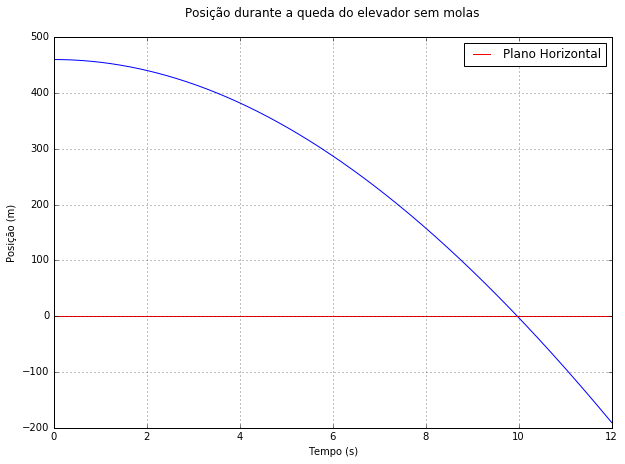

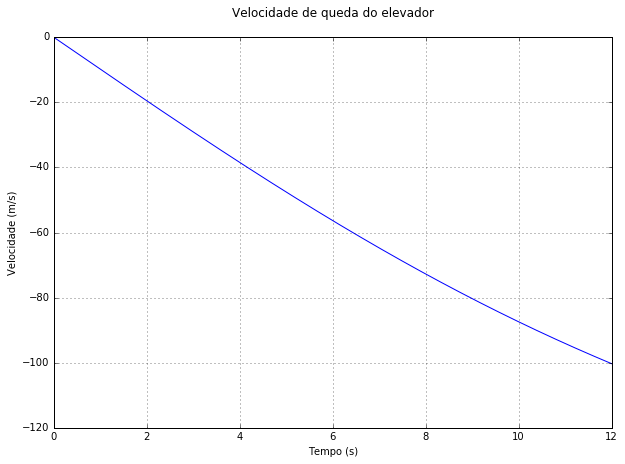

In [227]:
lista_tempo = linspace(0, 12, 1000)

E = odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm, L0Mola, KMola, Fundo))
 
plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E[:,0])
plt.plot([0, 12], [0, 0], 'r', label='Plano Horizontal')
plt.title('Posição durante a queda do elevador sem molas\n')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E[:,1])
plt.title('Velocidade de queda do elevador\n')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()

Comprimento do Fundo: 305.0 m
Coeficiente Elático da Mola: 9374.0 N/m


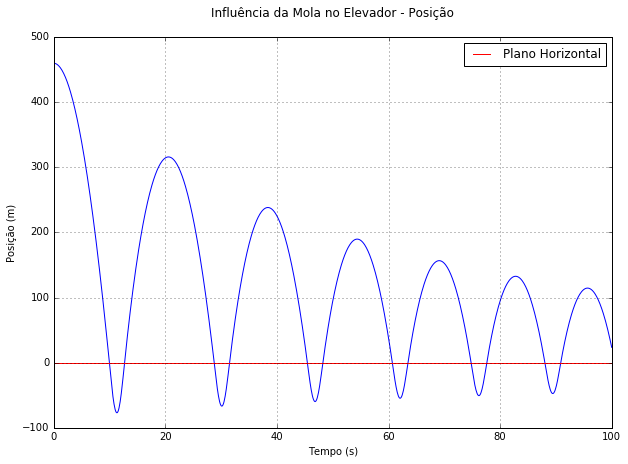

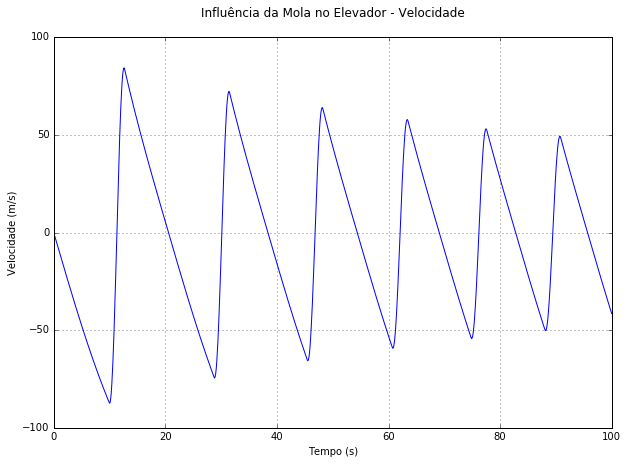

In [228]:
#O SISTEMA FUNCIONA?
lista_tempo = linspace(0, 100, 1000)
k = 218000
l0 = 0.305
conjuntos = 43
numero_empilhadas = 1000
Fm = 0

L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
Fundo = L0Mola
E_1Mola = odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm, L0Mola, KMola, Fundo))
print("""Comprimento do Fundo: {0} m
Coeficiente Elático da Mola: {1} N/m""".format(Fundo, KMola))

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E_1Mola[:,0])
plt.plot([0, 100], [0, 0], 'r', label='Plano Horizontal')
plt.title('Influência da Mola no Elevador - Posição\n')
plt.ylabel('Posição (m)')
plt.xlabel('Tempo (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E_1Mola[:,1])
plt.title('Influência da Mola no Elevador - Velocidade\n')
plt.ylabel('Velocidade (m/s)')
plt.xlabel('Tempo (s)')
plt.grid()
plt.show()

Comprimento do Fundo: 305.0 m
Coeficiente Elático da Mola: 9374.0 N/m


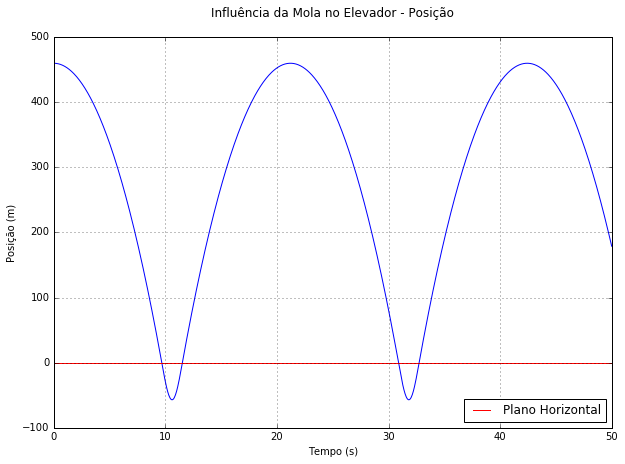

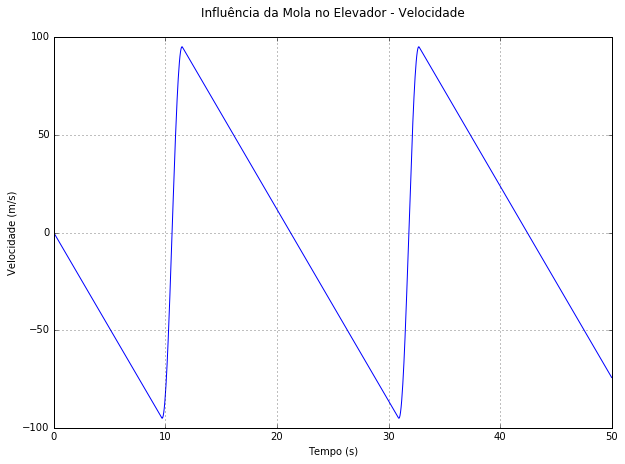

In [229]:
#VALIDAÇÃO 1 DO MODELO - Sem força de arrasto e a massa invariável
#--------------------------------------------------------------------------------------------------------------------------------
lista_tempo = linspace(0, 50, 1000)
k = 218000
l0 = 0.305
conjuntos = 43
numero_empilhadas = 1000
Fm = 0

L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
Fundo = L0Mola

E_1Mola = odeint(Derivadas, L, lista_tempo, args=(Melevador, Melevador, g, 0, 0, 0, 0, L0Mola, KMola, Fundo))

print("""Comprimento do Fundo: {0} m
Coeficiente Elático da Mola: {1} N/m""".format(Fundo, KMola))

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E_1Mola[:,0])
plt.plot([0, 50], [0, 0], 'r', label='Plano Horizontal')
plt.title('Influência da Mola no Elevador - Posição\n')
plt.ylabel('Posição (m)')
plt.xlabel('Tempo (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E_1Mola[:,1])
plt.title('Influência da Mola no Elevador - Velocidade\n')
plt.ylabel('Velocidade (m/s)')
plt.xlabel('Tempo (s)')
plt.grid()
plt.show()

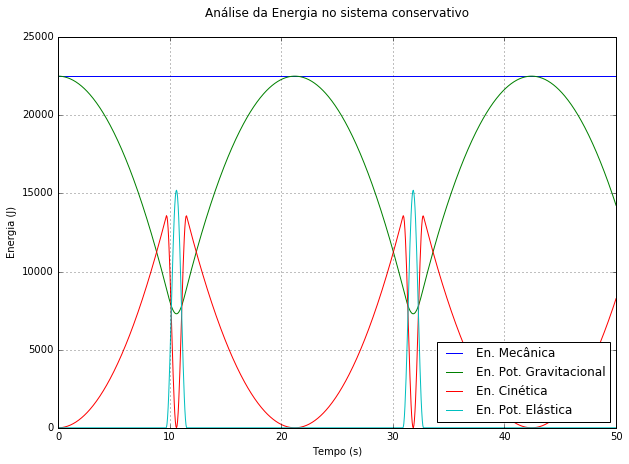

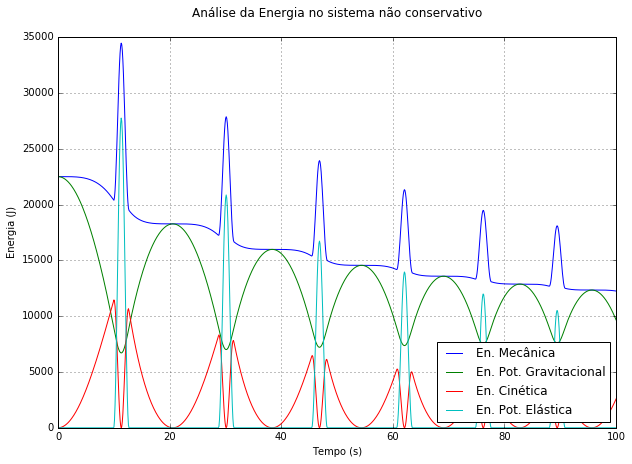

In [230]:
#Na validação vemos que como não há força de arrasto nem massa variável, o elevador não tem seu movimento interrompido
#VALIDAÇÃO 2 DO MODELO
#--------------------------------------------------------------------------------------------------------------------------------
Y = E_1Mola[:,0]
V = E_1Mola[:,1]
E_Pot = list()
E_Cin = list()
E_El = list()
E_Mec = list()
 
for i in range(0,len(Y)):
    epot = (2*Melevador*g*(Y[i]+Fundo))/1000
    E_Pot.append(epot)
    ecin = (0.5*2*Melevador*V[i]**2)/1000
    E_Cin.append(ecin)
    if Y[i]>=0:
        eel=0
    else:
        eel=(0.5*KMola*(Y[i]**2))/1000
    E_El.append(eel)
    E_Mec.append(epot+ecin+eel)                

plt.figure(figsize=(10, 7))
plt.title("Análise da Energia no sistema conservativo\n")
plt.plot(lista_tempo, E_Mec, 'b', label='En. Mecânica')
plt.plot(lista_tempo, E_Pot, 'g', label='En. Pot. Gravitacional')
plt.plot(lista_tempo, E_Cin, 'r', label='En. Cinética')
plt.plot(lista_tempo, E_El, 'c', label='En. Pot. Elástica')
plt.legend(loc='lower right')
plt.ylabel('Energia (J)')
plt.xlabel('Tempo (s)')
plt.grid()
plt.show()
#--------------------------------------------------------------------------------------------------------------------------------
#E se não fosse conservativo?
#--------------------------------------------------------------------------------------------------------------------------------
lista_tempo = linspace(0, 100, 1000)
k = 218000
l0 = 0.305
conjuntos = 43
numero_empilhadas = 1000
Fm = 0

L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
Fundo = L0Mola
E_1Mola = odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm, L0Mola, KMola, Fundo))

Y = E_1Mola[:,0]
V = E_1Mola[:,1]
E_Pot = list()
E_Cin = list()
E_El = list()
E_Mec = list()
 
for i in range(0,len(Y)):
    epot = (2*Melevador*g*(Y[i]+Fundo))/1000
    E_Pot.append(epot)
    ecin = (0.5*2*Melevador*V[i]**2)/1000
    E_Cin.append(ecin)
    if Y[i]>=0:
        eel=0
    else:
        eel=(0.5*KMola*(Y[i]**2))/1000
    E_El.append(eel)
    E_Mec.append(epot+ecin+eel)                

plt.figure(figsize=(10, 7))
plt.title("Análise da Energia no sistema não conservativo\n")
plt.plot(lista_tempo, E_Mec, 'b', label='En. Mecânica')
plt.plot(lista_tempo, E_Pot, 'g', label='En. Pot. Gravitacional')
plt.plot(lista_tempo, E_Cin, 'r', label='En. Cinética')
plt.plot(lista_tempo, E_El, 'c', label='En. Pot. Elástica')
plt.legend(loc='lower right')
plt.ylabel('Energia (J)')
plt.xlabel('Tempo (s)')
plt.grid()
plt.show()

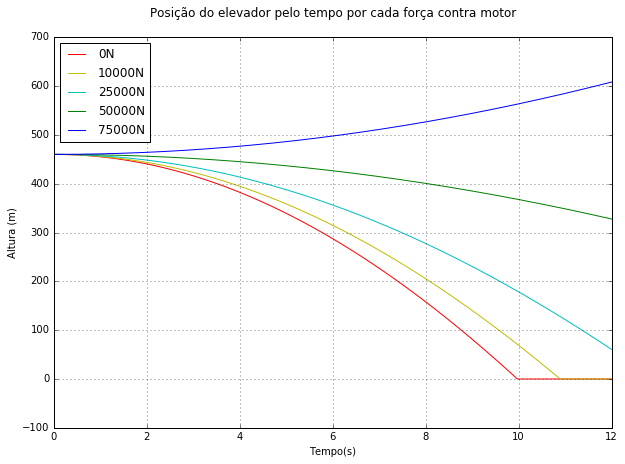

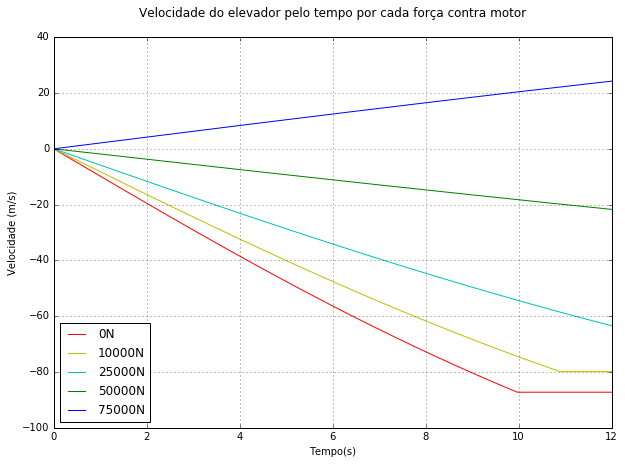

VELOCIDADES MÁXIMAS
Linha 1: 87.24 m/s
Linha 2: 79.87 m/s
Linha 3: 63.43 m/s
Linha 4: 21.71 m/s
Linha 5: 24.25 m/s


In [231]:
#ANALISANDO A INFLUÊNCIA DO MOTOR
lista_tempo = linspace(0, 12, 1000)

L = [460, 0] #Condições iniciais --> começa no topo do prédio em repouso
Melevador = 1500
Mpessoas = 4800
g = 9.807
p = 1.2
Ca = 1
A = 4
L0Mola = 0
KMola = 0
Fundo = 0

EL1 = odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, 0, L0Mola, KMola, Fundo))
EL2 = odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, 10000, L0Mola, KMola, Fundo))
EL3 = odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, 25000, L0Mola, KMola, Fundo))
EL4 = odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, 50000, L0Mola, KMola, Fundo))
EL5 = odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, 75000, L0Mola, KMola, Fundo))

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, EL1[:,0], 'r', label='0N')
plt.plot(lista_tempo, EL2[:,0], 'y', label='10000N')
plt.plot(lista_tempo, EL3[:,0], 'c', label='25000N')
plt.plot(lista_tempo, EL4[:,0], 'g', label='50000N')
plt.plot(lista_tempo, EL5[:,0], 'b', label='75000N')
plt.title('Posição do elevador pelo tempo por cada força contra motor\n')
plt.ylabel('Altura (m)')
plt.xlabel('Tempo(s)')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, EL1[:,1], 'r', label='0N')
plt.plot(lista_tempo, EL2[:,1], 'y', label='10000N')
plt.plot(lista_tempo, EL3[:,1], 'c', label='25000N')
plt.plot(lista_tempo, EL4[:,1], 'g', label='50000N')
plt.plot(lista_tempo, EL5[:,1], 'b', label='75000N')
plt.title('Velocidade do elevador pelo tempo por cada força contra motor\n')
plt.ylabel('Velocidade (m/s)')
plt.xlabel('Tempo(s)')
plt.legend(loc='best')
plt.grid()
plt.show()

Elevadores = [EL1, EL2, EL3, EL4, EL5]
VelocidadesMax = list()

for Elevador in Elevadores:
    velocidade_max = 0
    for velocidade in list(Elevador[:,1]):
        if velocidade < 0:
            if velocidade*(-1) > velocidade_max:
                velocidade_max = velocidade*(-1)
        else:
            if velocidade > velocidade_max:
                velocidade_max = velocidade
    VelocidadesMax.append(velocidade_max)

print('VELOCIDADES MÁXIMAS')
for i in range(0, 5):
    print("Linha {0}: {1} m/s".format(i+1, VelocidadesMax[i].round(2)))

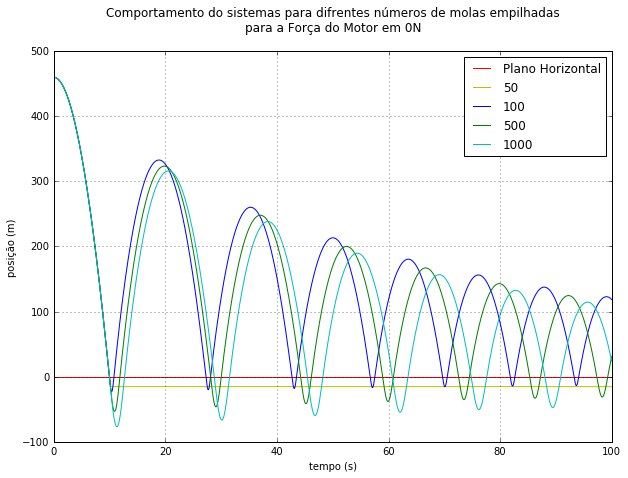

Aceleração Máxima: 117.684
Linha 444.37
Linha 397.27
Linha 148.72
Linha 104.71

50 molas: Dead
100 molas: Dead
500 molas: Dead
1000 molas: Alive



In [232]:
#ADICIONANDO MOLAS AO SISTEMA --> ANÁLISE DE DIFERENTES l0s
lista_tempo = linspace(0, 100, 1000)
k = 218000
l0 = 0.305
conjuntos = 43
Fm = 0
E = list()

Aceleracoes = list()

for numero_empilhadas in [50, 100, 500, 1000]:
    Aceleracao = list()
    L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
    Fundo = L0Mola
    E.append(odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm, L0Mola, KMola, Fundo)))
    Aceleracoes.append(Aceleracao)
    
plt.figure(figsize=(10, 7))
plt.plot([0, 100], [0, 0], 'r', label='Plano Horizontal')
plt.plot(lista_tempo, E[0][:,0], 'y', label='50')
plt.plot(lista_tempo, E[1][:,0], 'b', label='100')
plt.plot(lista_tempo, E[2][:,0], 'g', label='500')
plt.plot(lista_tempo, E[3][:,0], 'c', label='1000')
plt.legend(loc='best')
plt.xlabel('tempo (s)')
plt.ylabel('posição (m)')
plt.title('Comportamento do sistemas para difrentes números de molas empilhadas\npara a Força do Motor em {0}N\n'.format(Fm))
plt.grid()
plt.show()

Amax = g*12
print('Aceleração Máxima:', Amax)
Resultados = list()

dead = False

for i in range(0, 4):
    dead = False
    print('Linha {0}'.format(max(Aceleracoes[i]).round(2)))
    for acc in Aceleracoes[i]:
        if acc > Amax:
            dead = True
            break
    if dead:
        Resultados.append(['Dead', i+1])
    else:
        Resultados.append(['Alive', i+1])

print('''
50 molas: {0}
100 molas: {1}
500 molas: {2}
1000 molas: {3}
'''.format(Resultados[0][0], Resultados[1][0], Resultados[2][0], Resultados[3][0]))

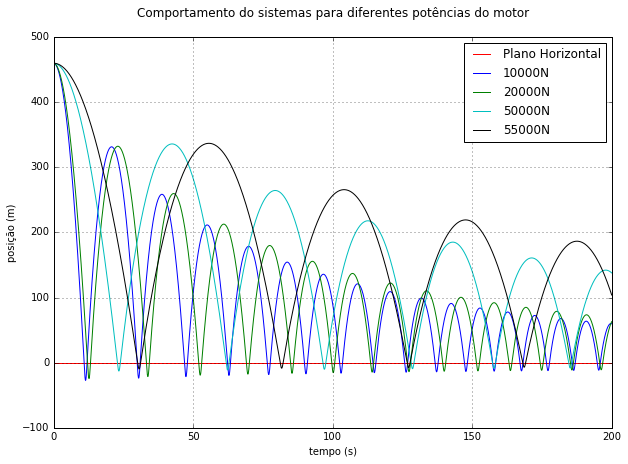

Aceleração Máxima: 12G
Linha 2: 40.51G
Linha 3: 15.16G
Linha 4: 10.68G
Linha 5: 25.59G

Os passageiros sobreviveram?
10000N: False
20000N: False
50000N: True
55000N: False



In [242]:
#PROFUNDIDADE MÁXIMA---> 50m ----> 163 molas
#Mesmo que quiséssemos, é impraticável um "buraco" de 300m de profundidade com 43000 molas
#Desse modo, a máxima profunfidade que conseguimos usar é de 50m (profundidade da fundação do prédio)

lista_tempo = linspace(0, 200, 10000)
E = list()
k = 218000
l0 = 0.305
numero_empilhadas = 163
conjuntos = 43

for Fm in [5000, 10000, 20000, 50000, 55000]:
    Aceleracao = list()
    L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
    Fundo = L0Mola
    E.append(odeint(Derivadas, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm, L0Mola, KMola, Fundo)))
    Aceleracoes.append(Aceleracao)
    
plt.figure(figsize=(10, 7))
plt.plot([0, 200], [0, 0], 'r', label='Plano Horizontal')
#plt.plot(lista_tempo, E[0][:,0], 'y', label='5000N')
plt.plot(lista_tempo, E[1][:,0], 'b', label='10000N')
plt.plot(lista_tempo, E[2][:,0], 'g', label='20000N')
plt.plot(lista_tempo, E[3][:,0], 'c', label='50000N')
plt.plot(lista_tempo, E[4][:,0], 'black', label='55000N')
plt.legend(loc='best')
plt.xlabel('tempo (s)')
plt.ylabel('posição (m)')
plt.title('Comportamento do sistemas para diferentes potências do motor\n'.format(Fm))
plt.grid()
plt.show()

dead = False

Amax = g*12
print('Aceleração Máxima: 12G')

Resultados = list()

for i in range(1, 5):
    dead = False
    print('Linha {0}: {1}G'.format(i+1, ((max(Aceleracoes[i]).round(2))/g).round(2)))
    for acc in Aceleracoes[i]:
        if acc > Amax:
            dead = True
            break
    if dead:
        Resultados.append(['False', i+1])
    else:
        Resultados.append(['True', i+1])

print('''
Os passageiros sobreviveram?
10000N: {0}
20000N: {1}
50000N: {2}
55000N: {3}
'''.format(Resultados[0][0], Resultados[1][0], Resultados[2][0], Resultados[3][0]))  

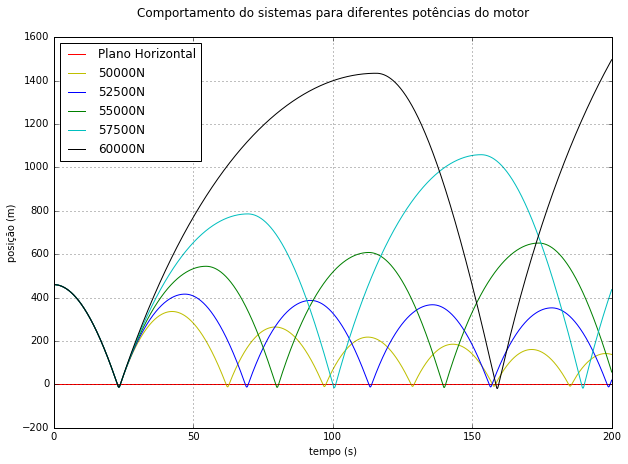

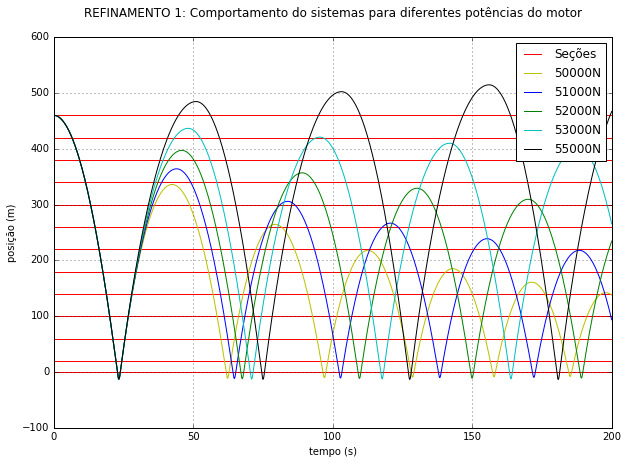

In [244]:
"""Até aqui: 43 conjuntos com 163 molas empilhadas (k=218000, l0=0.305)
As forças que seguram o elevador na descida e puxam na subida tem que ser diferentes, pois a descida é 'suave' o suficiente
mas o motor não da conta de puxar na subida"""

def Derivadas2(L, lista_tempo, Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo):
    Y = L[0]
    V = L[1]
    
    if Y <= -1*Fundo:
        dydt = 0
        dvdt = 0
    
    else:
        if V > 0: #SUBINDO
            if Y <= 0:
                Fe = KMola*(0-Y)
            else:
                Fe = 0
            dydt = V
            dvdt = ((-(Melevador+Mpessoas)*g)-0.5*p*(V**2)*Ca*A + Fm_subida + Fe)/(Melevador+Mpessoas)

        else: #DESCENDO
            if Y <= 0:
                Fe = KMola*(0-Y)
            else:
                Fe = 0
            dydt = V
            dvdt = ((-(Melevador+Mpessoas)*g)+0.5*p*(V**2)*Ca*A + Fm_descida + Fe)/(Melevador+Mpessoas)
    
    Aceleracao.append(dvdt)
    return dydt, dvdt   

k = 218000
l0 = 0.305
conjuntos = 43
numero_empilhadas = 163
Fm_descida = 50000
E = list()

for Fm_subida in [50000, 52500, 55000, 57500, 60000]:
    Aceleracao = list()
    L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
    Fundo = L0Mola
    E.append(odeint(Derivadas2, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo)))
    Aceleracoes.append(Aceleracao)
    
plt.figure(figsize=(10, 7))
plt.plot([0, 200], [0, 0], 'r', label='Plano Horizontal')
plt.plot(lista_tempo, E[0][:,0], 'y', label='50000N')
plt.plot(lista_tempo, E[1][:,0], 'b', label='52500N')
plt.plot(lista_tempo, E[2][:,0], 'g', label='55000N')
plt.plot(lista_tempo, E[3][:,0], 'c', label='57500N')
plt.plot(lista_tempo, E[4][:,0], 'black', label='60000N')
plt.legend(loc='best')
plt.xlabel('tempo (s)')
plt.ylabel('posição (m)')
plt.title('Comportamento do sistemas para diferentes potências do motor\n'.format(Fm))
plt.grid()
plt.show()

#REFINANDO OS RESULTADOS-----------------------------------------------------------------------------------------------------

E = list()

for Fm_subida in [50000, 51000, 52000, 53000, 54000]:
    Aceleracao = list()
    L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
    Fundo = L0Mola
    E.append(odeint(Derivadas2, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo)))
    Aceleracoes.append(Aceleracao)
    
plt.figure(figsize=(10, 7))
plt.plot([0, 200], [460, 460], 'r')
plt.plot([0, 200], [420, 420], 'r')
plt.plot([0, 200], [380, 380], 'r')
plt.plot([0, 200], [340, 340], 'r')
plt.plot([0, 200], [300, 300], 'r')
plt.plot([0, 200], [260, 260], 'r')
plt.plot([0, 200], [220, 220], 'r')
plt.plot([0, 200], [180, 180], 'r')
plt.plot([0, 200], [140, 140], 'r')
plt.plot([0, 200], [100, 100], 'r')
plt.plot([0, 200], [60, 60], 'r')
plt.plot([0, 200], [20, 20], 'r')
plt.plot([0, 200], [0, 0], 'r', label='Seções')
plt.plot(lista_tempo, E[0][:,0], 'y', label='50000N')
plt.plot(lista_tempo, E[1][:,0], 'b', label='51000N')
plt.plot(lista_tempo, E[2][:,0], 'g', label='52000N')
plt.plot(lista_tempo, E[3][:,0], 'c', label='53000N')
plt.plot(lista_tempo, E[4][:,0], 'black', label='55000N')
plt.legend(loc='best')
plt.xlabel('tempo (s)')
plt.ylabel('posição (m)')
plt.title('REFINAMENTO 1: Comportamento do sistemas para diferentes potências do motor\n'.format(Fm))
plt.grid()
plt.show()

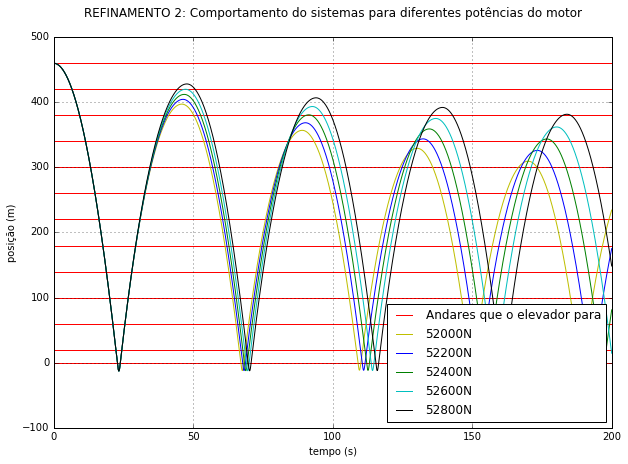

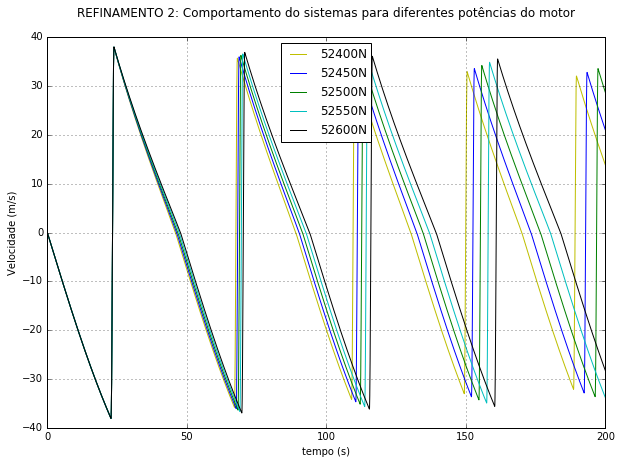

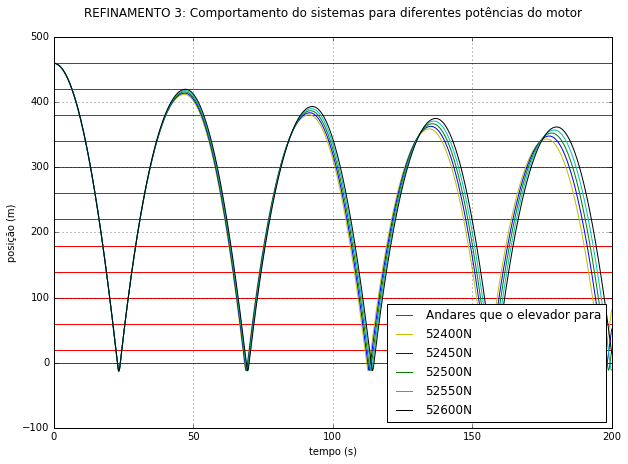

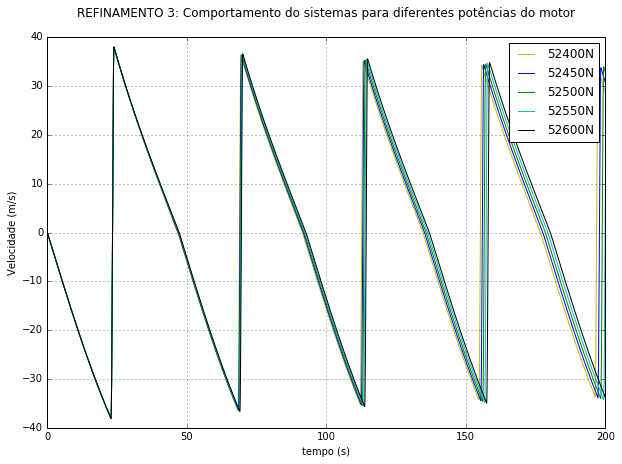

In [235]:
#REFINANDO OS RESULTADOS (MAIS UMA VEZ)----------------------------------------------------------------------------------------------
#FM_SUBIDA entre 52000 e 53000

E = list()

for Fm_subida in [52000, 52200, 52400, 52600, 52800]:
    Aceleracao = list()
    L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
    Fundo = L0Mola
    E.append(odeint(Derivadas2, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo)))
    Aceleracoes.append(Aceleracao)
    
plt.figure(figsize=(10, 7))
plt.plot([0, 200], [460, 460], 'r')
plt.plot([0, 200], [420, 420], 'r')
plt.plot([0, 200], [380, 380], 'r')
plt.plot([0, 200], [340, 340], 'r')
plt.plot([0, 200], [300, 300], 'r')
plt.plot([0, 200], [260, 260], 'r')
plt.plot([0, 200], [220, 220], 'r')
plt.plot([0, 200], [180, 180], 'r')
plt.plot([0, 200], [140, 140], 'r')
plt.plot([0, 200], [100, 100], 'r')
plt.plot([0, 200], [60, 60], 'r')
plt.plot([0, 200], [20, 20], 'r')
plt.plot([0, 200], [0, 0], 'r', label='Andares que o elevador para')
plt.plot(lista_tempo, E[0][:,0], 'y', label='52000N')
plt.plot(lista_tempo, E[1][:,0], 'b', label='52200N')
plt.plot(lista_tempo, E[2][:,0], 'g', label='52400N')
plt.plot(lista_tempo, E[3][:,0], 'c', label='52600N')
plt.plot(lista_tempo, E[4][:,0], 'black', label='52800N')
plt.legend(loc='best')
plt.xlabel('tempo (s)')
plt.ylabel('posição (m)')
plt.title('REFINAMENTO 2: Comportamento do sistemas para diferentes potências do motor\n'.format(Fm))
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E[0][:,1], 'y', label='52400N')
plt.plot(lista_tempo, E[1][:,1], 'b', label='52450N')
plt.plot(lista_tempo, E[2][:,1], 'g', label='52500N')
plt.plot(lista_tempo, E[3][:,1], 'c', label='52550N')
plt.plot(lista_tempo, E[4][:,1], 'black', label='52600N')
plt.legend(loc='best')
plt.xlabel('tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('REFINAMENTO 2: Comportamento do sistemas para diferentes potências do motor\n'.format(Fm))
plt.grid()
plt.show()

#REFINANDO OS RESULTADOS (MAIS UMA VEZ)----------------------------------------------------------------------------------------------
#FM_SUBIDA entre 52400 e 52600

E = list()

for Fm_subida in [52400, 52450, 52500, 52550, 52600]:
    Aceleracao = list()
    L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
    Fundo = L0Mola
    E.append(odeint(Derivadas2, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo)))
    Aceleracoes.append(Aceleracao)
    
plt.figure(figsize=(10, 7))
plt.plot([0, 200], [460, 460], 'r')
plt.plot([0, 200], [420, 420], 'r')
plt.plot([0, 200], [380, 380], 'r')
plt.plot([0, 200], [340, 340], 'r')
plt.plot([0, 200], [300, 300], 'r')
plt.plot([0, 200], [260, 260], 'r')
plt.plot([0, 200], [220, 220], 'r')
plt.plot([0, 200], [180, 180], 'r')
plt.plot([0, 200], [140, 140], 'r')
plt.plot([0, 200], [100, 100], 'r')
plt.plot([0, 200], [60, 60], 'r')
plt.plot([0, 200], [20, 20], 'r')
plt.plot([0, 200], [0, 0], 'r', label='Andares que o elevador para')
plt.plot(lista_tempo, E[0][:,0], 'y', label='52400N')
plt.plot(lista_tempo, E[1][:,0], 'b', label='52450N')
plt.plot(lista_tempo, E[2][:,0], 'g', label='52500N')
plt.plot(lista_tempo, E[3][:,0], 'c', label='52550N')
plt.plot(lista_tempo, E[4][:,0], 'black', label='52600N')
plt.legend(loc='best')
plt.xlabel('tempo (s)')
plt.ylabel('posição (m)')
plt.title('REFINAMENTO 3: Comportamento do sistemas para diferentes potências do motor\n'.format(Fm))
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E[0][:,1], 'y', label='52400N')
plt.plot(lista_tempo, E[1][:,1], 'b', label='52450N')
plt.plot(lista_tempo, E[2][:,1], 'g', label='52500N')
plt.plot(lista_tempo, E[3][:,1], 'c', label='52550N')
plt.plot(lista_tempo, E[4][:,1], 'black', label='52600N')
plt.legend(loc='best')
plt.xlabel('tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('REFINAMENTO 3: Comportamento do sistemas para diferentes potências do motor\n'.format(Fm))
plt.grid()
plt.show()

**DADOS OBTIDOS ATÉ AGORA| **
O elevador tem grande potencial de funcionar, porém ainda falta analisar como as pessoas podem ser evacuadas do prédio e o uso de baterias para suprir o motor.
Dados Obtidos para o sistema mecânico (para cada elevador):

1. Força do Motor
O motor tem que ser capaz de fornecer 52500N de força, sendo essa na subida e uma força contra-motor de 50000N
 
2. Molas
Cada mola individualmente tem um coeficiente elástico de 218000N/m e, por elevador vão 7009 molas de comprimento 0,305m, totalizando 43 conjuntos de 163 molas.

3. Andares
O elevador não consegue ser tão preciso para parar nos andares

**A Escolha do motor| **
O Motor deverá executar uma força máxima de 52500N, considerando o uso de uma polia de 0.5m de diâmetro*, podemos calcular qual o torque e irmos atrás de um motor do tipo
*Essa polia foi escolhida de modo que fizesse sentido em relação ao tamanho do elevador (Schindler 7000)

Torque máximo: 13125.0 Nm


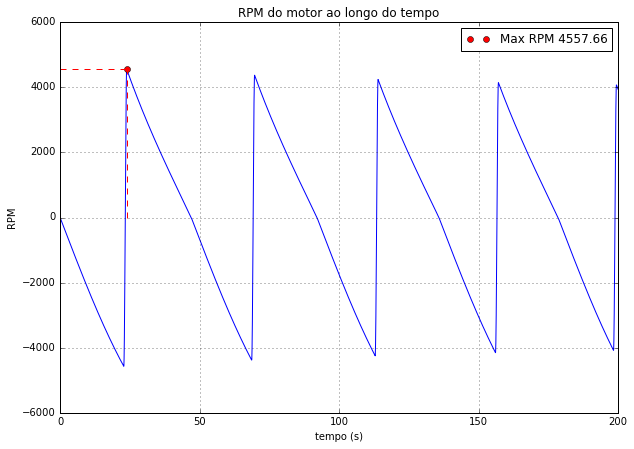

In [236]:
#Torque = Força * Distância(No caso o raio da polia)

Torque = 52500*(0.5/2) #raio

print("Torque máximo:", Torque, "Nm")

#Vel. Angular max --> w = Vmax/R 
#RPM = w*60

Fm_descida = 50000
Fm_subida = 52500

E = (odeint(Derivadas2, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo)))

RPMList = list()
     
for vel in list(E[:,1]):
     RPMList.append(vel*60/0.5)
    
plt.figure(figsize=(10,7))
plt.plot(lista_tempo, RPMList)
plt.plot([lista_tempo[RPMList.index(max(RPMList))]], [max(RPMList)], 'ro', label='Max RPM {0}'.format(max(RPMList).round(2)))
plt.plot([0, lista_tempo[RPMList.index(max(RPMList))]], [max(RPMList), max(RPMList)], 'r--')
plt.plot([lista_tempo[RPMList.index(max(RPMList))], lista_tempo[RPMList.index(max(RPMList))]], [0, max(RPMList)], 'r--')
plt.title('RPM do motor ao longo do tempo')
plt.ylabel('RPM')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

**O MOTOR| **
O Motor que deverá ser usado, por elevador, deverá ter as seguintes especificações

Torque >= 13125Nm


RPM >= 4558rpm

site com motores que tem especificações até maiores que essas:
http://www.directindustry.com/industrial-manufacturer/bevel-gear-motor-81784.html


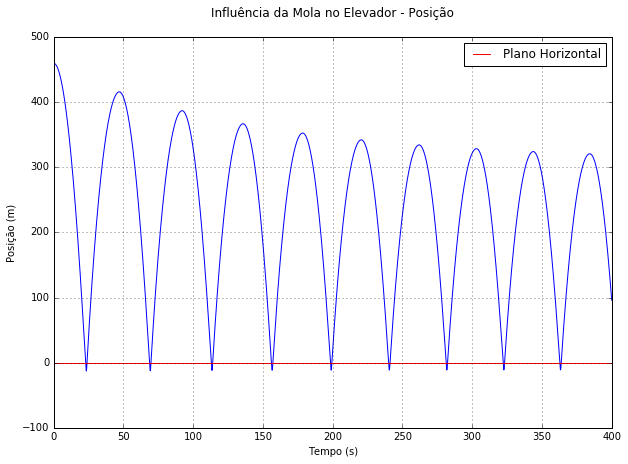

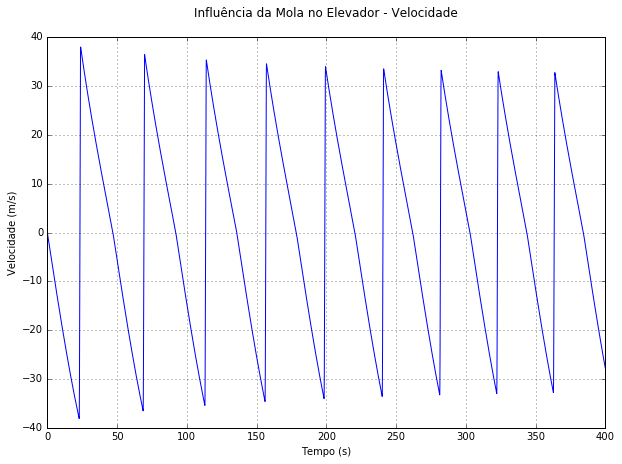

In [237]:
"""O SISTEMA FUNCIONANDO NORMALMENTE"""

lista_tempo = linspace(0, 400, 100000)

E = (odeint(Derivadas2, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo)))

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E[:,0])
plt.plot([0, 400], [0, 0], 'r', label='Plano Horizontal')
plt.title('Influência da Mola no Elevador - Posição\n')
plt.ylabel('Posição (m)')
plt.xlabel('Tempo (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(lista_tempo, E[:,1])
plt.title('Influência da Mola no Elevador - Velocidade\n')
plt.ylabel('Velocidade (m/s)')
plt.xlabel('Tempo (s)')
plt.grid()
plt.show()

Pessoas Evacuadas: 840
Número de ciclos: 14.0
Tempo de evacuação: 618.92s
Velocidade Máxima: 37.97m/s


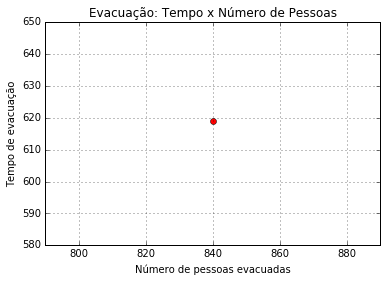

C:\Users\Lucas\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


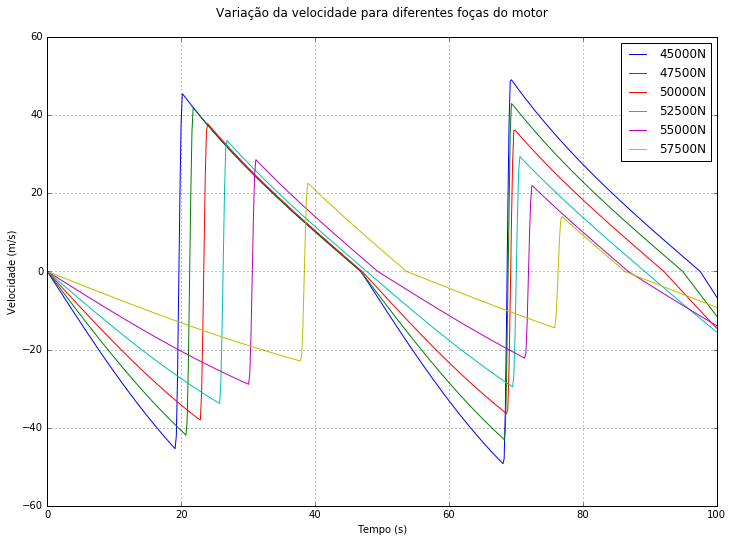

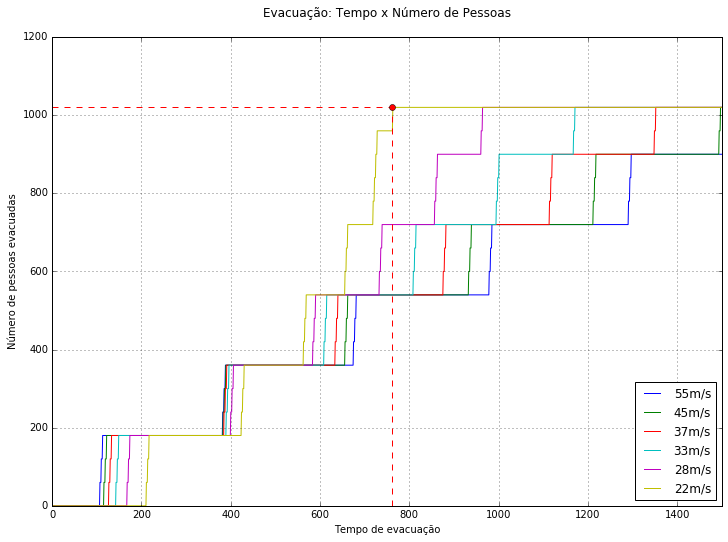

In [256]:
#Número de pessoas evacuadas
lista_tempo = linspace(0, 1800, 10000)

L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
Fundo = L0Mola

Fm_descida = 50000
Fm_subida = 52500

E = (odeint(Derivadas2, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo)))

Y = list(E[:,0])
V = list(E[:, 1])

numero_pessoas = 800
pessoas_evacuadas = 0

once = False
value = str()

for pos in Y:
    if not pessoas_evacuadas >= numero_pessoas:
        if pos < 0 and once:
            pessoas_evacuadas += 60
            once = False
        else: 
            once = True
    else:
        value = pos
        break
               
tempo_de_evacuacao = lista_tempo[Y.index(value)]+30*(pessoas_evacuadas/60)

vel_max = 0

for vel in V:
    if vel < 0:
        if vel*-1 > vel_max:
            vel_max = vel*-1

    else:
        if vel > vel_max:
            vel_max = vel
            
print("""Pessoas Evacuadas: {0}
Número de ciclos: {1}
Tempo de evacuação: {2}s
Velocidade Máxima: {3}m/s""".format(pessoas_evacuadas, pessoas_evacuadas/60, tempo_de_evacuacao.round(2), vel_max.round(2)))

plt.plot(pessoas_evacuadas, tempo_de_evacuacao, 'ro')
plt.grid()
plt.xlabel('Número de pessoas evacuadas')
plt.ylabel('Tempo de evacuação')
plt.title('Evacuação: Tempo x Número de Pessoas')
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------

E = list()
Fm_subida = 52500
descidaFm = range(45000, 60000, 2500)

plt.figure(figsize=(12, 12*.7))

contador = 0
for Fm_descida in descidaFm:
    E.append(odeint(Derivadas2, L, lista_tempo, args=(Melevador, Mpessoas, g, p, Ca, A, Fm_descida, Fm_subida, L0Mola, KMola, Fundo)))
    plt.plot(lista_tempo, E[contador][:,1], label="{0}N".format(Fm_descida))
    contador+=1
    
plt.title('Variação da velocidade para diferentes foças do motor\n')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.axis([0, 100, -60, 60])
plt.legend(loc='best')
plt.grid()
plt.show()
    
plt.figure(figsize=(12, 12*.7))
    
numero_pessoas = 1000

contador = 0
for Elevadores in E:
    
    pessoas_evacuadas = 0
    lista_pesEvac = list()
    tempo_de_evacuacao = 0
    
    for pos in list(Elevadores[:,0]):
        if not pessoas_evacuadas >= numero_pessoas:
            if pos < 0 and once:
                pessoas_evacuadas += 60
                lista_pesEvac.append(pessoas_evacuadas)
                once = False
            else: 
                once = True
        else:
            value = pos
            
        lista_pesEvac.append(pessoas_evacuadas)

    #tempo_de_evacuacao = lista_tempo[list(Elevadores[:,0]).index(value)]+30*(pessoas_evacuadas/60)

    vel_max = 0

    for vel in list(Elevadores[:,1]):
        if vel < 0:
            if vel*-1 > vel_max:
                vel_max = vel*-1

        else:
            if vel > vel_max:
                vel_max = vel
                
    lista_tempo = linspace(0, len(lista_pesEvac), 10017)
    
    plt.plot(lista_tempo, lista_pesEvac, label="{0}m/s".format(int(vel_max)), ls="-")
    contador+=1

plt.plot([0, 762], [1020, 1020], 'r--')#, label='Evacuação de\n1040 pessoas')   
plt.plot([762, 762], [0, 1020], 'r--')
plt.plot([762], [1020], 'ro')
plt.legend(loc='best')
plt.axis([0, 1500, 0, 1200])
plt.ylabel('Número de pessoas evacuadas')
plt.xlabel('Tempo de evacuação')
plt.title('Evacuação: Tempo x Número de Pessoas\n')
plt.grid()
plt.show()



In [246]:
L0Mola, KMola = Molas(k, l0, numero_empilhadas, conjuntos)
print(KMola)

57509.20245398773
